**Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

# Transfer Learning Example

##  Autores

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Oleg Jarma, ojarmam@unal.edu.co
4. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## Referencias
1. Ian Goodfellow, Yosua Bengio and Aaron Courville, Deep Learning, MIT press, 2016.
2. Vincent Doumolin and Francesco Visin, A guide to convolution arithmetic for deep learning, ArXiv:1603.07285v2, 2018
3. [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)
4. [Gentle Dive into Math Behind Convolutional Neural Networks](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9)

## Contenido

* [Introducción](#Introducción)
* [Transfer Learning](#Transfer-Learning)
    * [Cats Vs Dogs Filtered](#Cats-Vs-Dogs-Filtered)

## Introducción 

No sólo es importante la construcción de buenos modelos para predecir y clasificar, sino también el uso que esos modelos puedan tener en el largo plazo y en diferentes tipos de problemas.

Hoy veremos un famoso modelo, conocido como **InceptionV3**.

Estos modelos son bastantes robustos, por lo que recomendamos correrlos desde Colaboratory.

[[Volver al Inicio]](#Contenido)

## Transfer Learning 

*La transferencia de conocimiento (Transfer Learning) es un problema que se centra en almacenar el conocimiento adquirido mientras se resuelve un problema y se aplica a un problema diferente pero relacionado [[1]](https://en.wikipedia.org/wiki/Transfer_learning).*

Un modelo del estado del arte, se conoce como **InceptionV3**. 

Este modelo es una red neuronal convolucional que ayuda en el análisis y detección de objetos.

Nació inicialmente como un módulo para [GoogleNet](https://leonardoaraujosantos.gitbook.io/artificial-inteligence/machine_learning/deep_learning/googlenet).

**Dato Curioso: Sí, fue nombrada así después de la película con el mismo nombre.**

Mas info: [Wiki](https://en.wikipedia.org/wiki/Inceptionv3), [Intel](https://software.intel.com/content/www/us/en/develop/articles/inception-v3-deep-convolutional-architecture-for-classifying-acute-myeloidlymphoblastic.html).

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

# Bajar pesos desde Google
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Importar Modelo desde keras
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

# Miremos alguna capa del modelo
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-10-08 20:31:23--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   144MB/s    in 0.6s    

2020-10-08 20:31:24 (144 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


Para ver los parámetros de este modelo, ir [aquí](https://keras.io/api/applications/inceptionv3/)

**Sólo por curiosidad, visualizemos el modelo...**

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

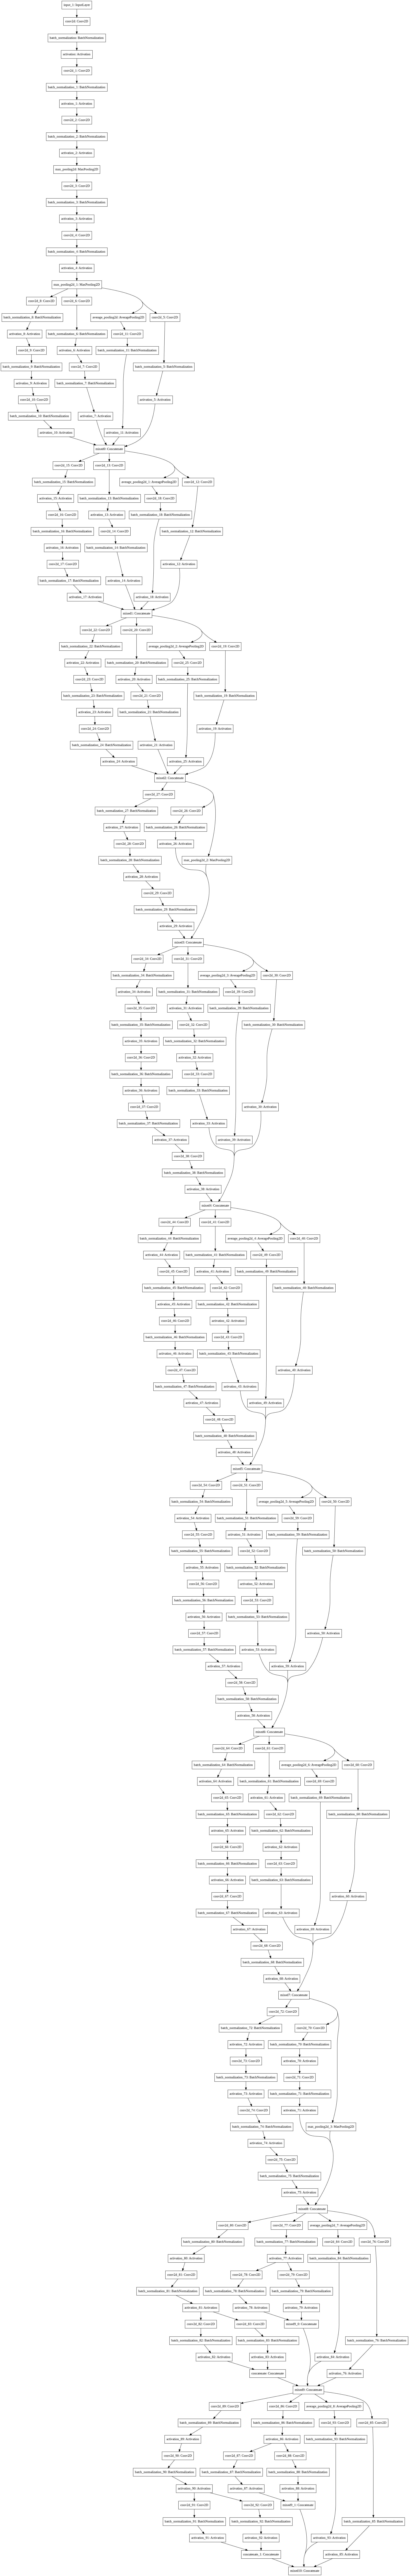

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(pre_trained_model)

Modifiquemos esta gran red para nuestros propósitos:

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

[[Volver al Inicio]](#Contenido)

## Cats Vs Dogs Filtered

In [ ]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

--2020-10-08 20:31:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   103MB/s    in 0.6s    

2020-10-08 20:31:35 (103 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Chequeemos, sólo por curiosidad, las capacidades de esta máquina remota:

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3634201026103108530, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14491053988706503099
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8579002964494533327
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12934441492858375553
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 1)

Epoch 1/20
100/100 [==============================] - 18s 181ms/step - loss: 0.7095 - accuracy: 0.8575 - val_loss: 0.1400 - val_accuracy: 0.9510
Epoch 2/20
100/100 [==============================] - 18s 175ms/step - loss: 0.2077 - accuracy: 0.9255 - val_loss: 0.1182 - val_accuracy: 0.9590
Epoch 3/20
100/100 [==============================] - 17s 174ms/step - loss: 0.1994 - accuracy: 0.9230 - val_loss: 0.0882 - val_accuracy: 0.9640
Epoch 4/20
100/100 [==============================] - 17s 172ms/step - loss: 0.1657 - accuracy: 0.9325 - val_loss: 0.0906 - val_accuracy: 0.9670
Epoch 5/20
100/100 [==============================] - 17s 174ms/step - loss: 0.1518 - accuracy: 0.9355 - val_loss: 0.1214 - val_accuracy: 0.9530
Epoch 6/20
100/100 [==============================] - 17s 174ms/step - loss: 0.1482 - accuracy: 0.9400 - val_loss: 0.1039 - val_accuracy: 0.9610
Epoch 7/20
100/100 [==============================] - 17s 175ms/step - loss: 0.1519 - accuracy: 0.9390 - val_loss: 0.0957 - val_ac

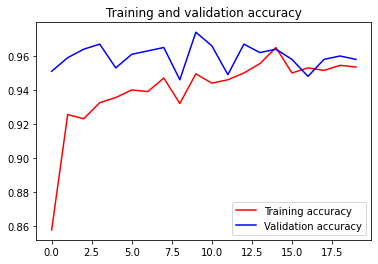

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

**Sugerencia:** Colocar los respectivos módulos de predicción para entender las predicciones del modelo.

[[Volver al Inicio]](#Contenido)